## Part 1 - NBA Player Comparision

In [2]:
# As usual, we begin by importing the packages we will need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# The data consists of the shot log for the NBA season 2016/17

shot = pd.read_csv("Assignment Data/Week 3/NBA shotlog_16_17.csv")
pd.set_option('display.max_columns', 100)
print(shot.columns.tolist())
shot.describe()

['self_previous_shot', 'player_position', 'home_game', 'location_x', 'opponent_previous_shot', 'home_team', 'shot_type', 'points', 'away_team', 'location_y', 'time', 'date', 'shoot_player', 'time_from_last_shot', 'quarter', 'current_shot_outcome']


,location_x,points,location_y,time_from_last_shot,quarter
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383
std,345.063654,0.464965,111.02320,19.797357,1.136841
min,0.000000,2.000000,0.00000,0.000000,1.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000


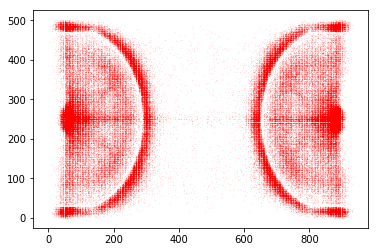

In [4]:
x = shot['location_x']
y = shot['location_y']
plt.scatter(x,y, s=.005,c='r', marker= '.')

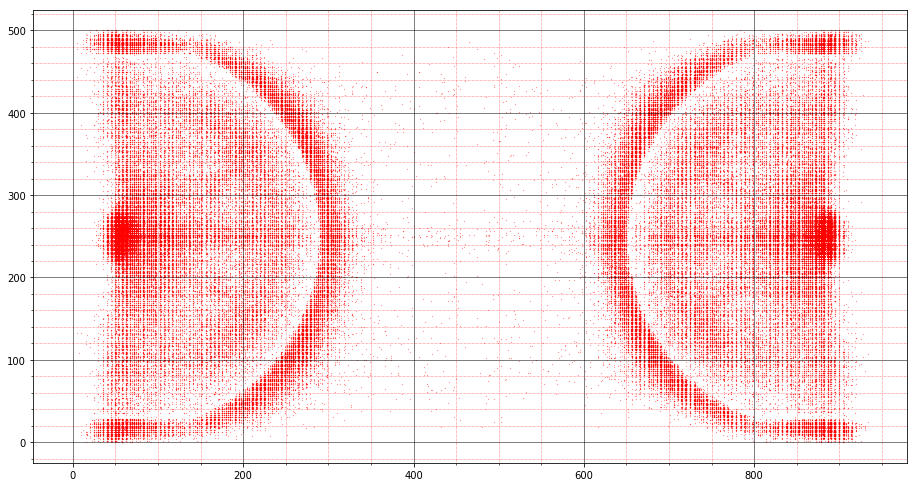

In [5]:
# A simple plot of coordinates, scaled for court dimensions and with grid added.

plt.figure(figsize=(94/6,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')

(466.5, 933)

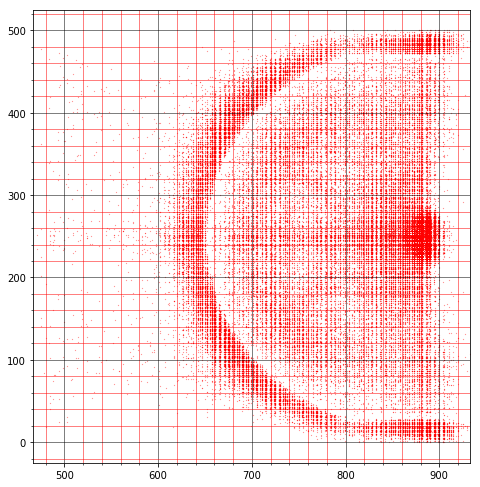

In [6]:
# The right hand half court

plt.figure(figsize=(94/12,50/6))
plt.scatter(x,y, s=.1,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linewidth='.5', color='black')
plt.grid(which='minor', linewidth='.5', color='red')
plt.xlim(933/2, 933)

In [7]:
shot['halfcourt_x'] =np.where(shot['location_x'] < 933/2, 933 - shot['location_x'],shot['location_x'])
shot['halfcourt_y'] =np.where(shot['location_x'] < 933/2, 500 - shot['location_y'],shot['location_y'])
shot.describe()

,location_x,points,location_y,time_from_last_shot,quarter,halfcourt_x,halfcourt_y
count,209675.000000,210072.000000,209675.00000,200072.000000,210072.000000,209675.000000,209675.000000
mean,468.524507,2.316130,249.44723,33.279489,2.480383,799.731480,250.303947
std,345.063654,0.464965,111.02320,19.797357,1.136841,89.606222,111.024160
min,0.000000,2.000000,0.00000,0.000000,1.000000,468.000000,0.000000
25%,94.000000,2.000000,197.00000,22.000000,1.000000,720.000000,197.000000
50%,342.000000,2.000000,250.00000,31.000000,2.000000,841.000000,250.000000
75%,843.000000,3.000000,303.00000,41.000000,3.000000,878.000000,303.000000
max,933.000000,3.000000,500.00000,255.000000,8.000000,933.000000,500.000000


Text(0.5, 1.0, 'Shots')

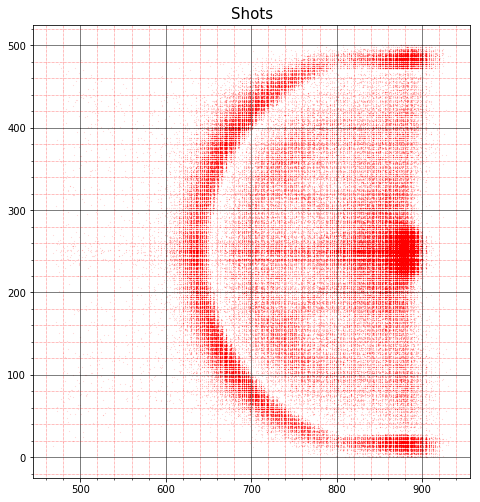

In [8]:
# all shots shown on a half court

hx = shot['halfcourt_x']
hy = shot['halfcourt_y']
plt.figure(figsize=(94/12,50/6))
plt.scatter(hx,hy, s=.01,c='r', marker= '.')
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='red')
plt.title("Shots", fontsize = 15)

In [9]:
# Comparing players

# We use a pivot table here to list players by shots

playersn = shot.groupby('shoot_player')['current_shot_outcome'].describe().reset_index()
playersn.sort_values(by = 'count', ascending = False)

,shoot_player,count,unique,top,freq
402,Russell Westbrook,1940,3,MISSED,1026
25,Andrew Wiggins,1568,3,MISSED,760
106,DeMar DeRozan,1545,3,MISSED,731
193,James Harden,1532,3,MISSED,772
28,Anthony Davis,1525,3,SCORED,770
88,Damian Lillard,1489,3,MISSED,728
257,Karl-Anthony Towns,1479,3,SCORED,802
175,Isaiah Thomas,1473,3,SCORED,682
262,Kemba Walker,1451,3,MISSED,695
424,Stephen Curry,1444,3,MISSED,713


In [10]:
# Durant subset

Durant = shot[shot['shoot_player']=='Kevin Durant']
Durant

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
63241,SCORED,SF,Yes,58.0,MISSED,GSW,Jump Shot,3,SAS,485.0,7:29,10/25/2016,Kevin Durant,27.0,2,MISSED,875.0,15.0
63246,MISSED,SF,Yes,52.0,MISSED,GSW,Driving Dunk,2,SAS,250.0,9:13,10/25/2016,Kevin Durant,8.0,2,SCORED,881.0,250.0
63248,MISSED,SF,Yes,52.0,MISSED,GSW,Cutting Dunk Shot,2,SAS,250.0,9:57,10/25/2016,Kevin Durant,20.0,2,SCORED,881.0,250.0
63249,SCORED,SF,Yes,265.0,SCORED,GSW,Jump Shot,3,SAS,390.0,10:32,10/25/2016,Kevin Durant,35.0,2,MISSED,668.0,110.0
63250,MISSED,SF,Yes,62.0,SCORED,GSW,Layup,2,SAS,265.0,11:14,10/25/2016,Kevin Durant,42.0,2,MISSED,871.0,235.0


## Westbrook - Durant Comparision

In [11]:
# Durant subset

Durant = shot[shot['shoot_player']=='Kevin Durant']
Durant

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
63211,MISSED,SF,Yes,197.0,SCORED,GSW,Turnaround Fadeaway,2,SAS,244.0,1:05,10/25/2016,Kevin Durant,26.0,1,SCORED,736.0,256.0
63217,MISSED,SF,Yes,98.0,MISSED,GSW,Step Back Jump Shot,2,SAS,87.0,5:01,10/25/2016,Kevin Durant,27.0,1,SCORED,835.0,413.0
63218,SCORED,SF,Yes,92.0,MISSED,GSW,Turnaround Fadeaway,2,SAS,413.0,5:34,10/25/2016,Kevin Durant,33.0,1,SCORED,841.0,87.0
63219,SCORED,SF,Yes,244.0,MISSED,GSW,Pullup Jump Shot,3,SAS,423.0,5:59,10/25/2016,Kevin Durant,25.0,1,SCORED,689.0,77.0
63227,SCORED,SF,Yes,103.0,SCORED,GSW,Pullup Jump Shot,2,SAS,125.0,11:07,10/25/2016,Kevin Durant,35.0,1,MISSED,830.0,375.0
63241,SCORED,SF,Yes,58.0,MISSED,GSW,Jump Shot,3,SAS,485.0,7:29,10/25/2016,Kevin Durant,27.0,2,MISSED,875.0,15.0
63246,MISSED,SF,Yes,52.0,MISSED,GSW,Driving Dunk,2,SAS,250.0,9:13,10/25/2016,Kevin Durant,8.0,2,SCORED,881.0,250.0
63248,MISSED,SF,Yes,52.0,MISSED,GSW,Cutting Dunk Shot,2,SAS,250.0,9:57,10/25/2016,Kevin Durant,20.0,2,SCORED,881.0,250.0
63249,SCORED,SF,Yes,265.0,SCORED,GSW,Jump Shot,3,SAS,390.0,10:32,10/25/2016,Kevin Durant,35.0,2,MISSED,668.0,110.0
63250,MISSED,SF,Yes,62.0,SCORED,GSW,Layup,2,SAS,265.0,11:14,10/25/2016,Kevin Durant,42.0,2,MISSED,871.0,235.0


In [12]:
# Westbrook subset

Westbrook = shot[shot['shoot_player']=='Russell Westbrook']
Westbrook

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
140311,NaN,PG,No,853.0,NaN,PHI,Jump Shot,2,OKL,76.0,0:17,10/26/2016,Russell Westbrook,NaN,1,MISSED,853.0,76.0
140314,MISSED,PG,No,802.0,SCORED,PHI,Pullup Jump Shot,2,OKL,367.0,1:51,10/26/2016,Russell Westbrook,50.0,1,SCORED,802.0,367.0
140319,BLOCKED,PG,No,853.0,SCORED,PHI,Jump Shot,2,OKL,308.0,3:59,10/26/2016,Russell Westbrook,27.0,1,BLOCKED,853.0,308.0
140321,SCORED,PG,No,809.0,SCORED,PHI,Pullup Jump Shot,2,OKL,433.0,4:54,10/26/2016,Russell Westbrook,34.0,1,MISSED,809.0,433.0
140322,MISSED,PG,No,895.0,SCORED,PHI,Driving Finger Roll Layup,2,OKL,270.0,5:44,10/26/2016,Russell Westbrook,50.0,1,SCORED,895.0,270.0
140324,MISSED,PG,No,882.0,BLOCKED,PHI,Running Layup,2,OKL,241.0,7:08,10/26/2016,Russell Westbrook,45.0,1,SCORED,882.0,241.0
140326,SCORED,PG,No,886.0,MISSED,PHI,Turnaround Jump Shot,2,OKL,401.0,7:59,10/26/2016,Russell Westbrook,28.0,1,SCORED,886.0,401.0
140349,MISSED,PG,No,819.0,SCORED,PHI,Step Back Jump Shot,2,OKL,138.0,7:26,10/26/2016,Russell Westbrook,23.0,2,SCORED,819.0,138.0
140353,SCORED,PG,No,889.0,SCORED,PHI,Jump Shot,2,OKL,434.0,9:38,10/26/2016,Russell Westbrook,48.0,2,SCORED,889.0,434.0
140354,SCORED,PG,No,763.0,MISSED,PHI,Step Back Jump Shot,2,OKL,136.0,10:07,10/26/2016,Russell Westbrook,29.0,2,MISSED,763.0,136.0


Text(0.5, 1.0, 'Kevin Durant')

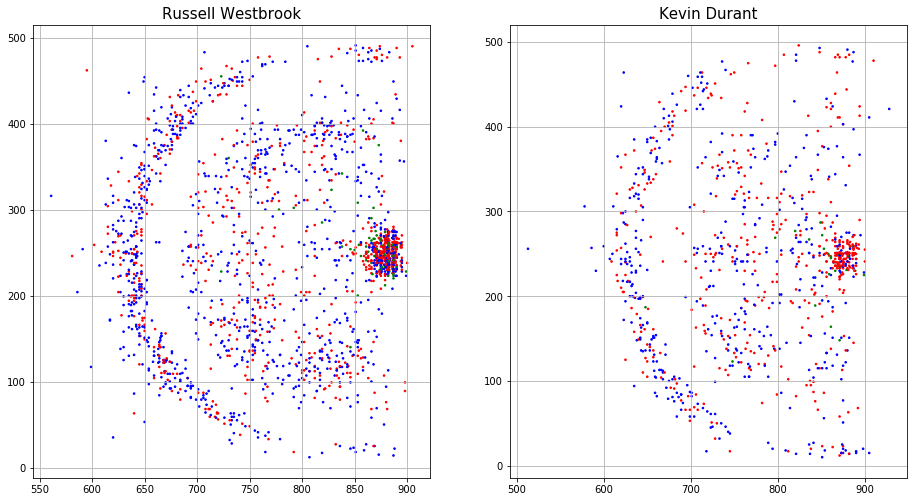

In [13]:
# Russell Westbrook and Kevin Durant side by side
hxW = Westbrook['halfcourt_x']
hyW = Westbrook['halfcourt_y']
hxD = Durant['halfcourt_x']
hyD = Durant['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Westbrook['current_shot_outcome']=='SCORED','r',np.where(Westbrook['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxW,hyW, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Russell Westbrook", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Durant['current_shot_outcome']=='SCORED','r',np.where(Durant['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxD,hyD, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Kevin Durant", fontsize = 15)

## Jordan - Howard Comparision

In [14]:
# Howard subset

Howard = shot[shot['shoot_player']=='Dwight Howard']
Howard

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
1,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,1:11,10/27/2016,Dwight Howard,2.0,1,SCORED,881.0,250.0
8,MISSED,C,Yes,107.0,SCORED,ATL,Turnaround Jump Shot,2,WAS,254.0,4:04,10/27/2016,Dwight Howard,3.0,1,MISSED,826.0,246.0
15,MISSED,C,Yes,62.0,MISSED,ATL,Jump Shot,2,WAS,329.0,7:36,10/27/2016,Dwight Howard,3.0,1,SCORED,871.0,171.0
17,MISSED,C,Yes,82.0,MISSED,ATL,Jump Bank Shot,2,WAS,373.0,8:22,10/27/2016,Dwight Howard,22.0,1,MISSED,851.0,127.0
39,MISSED,C,Yes,112.0,MISSED,ATL,Hook Shot,2,WAS,278.0,8:37,10/27/2016,Dwight Howard,125.0,2,SCORED,821.0,222.0
41,MISSED,C,Yes,53.0,SCORED,ATL,Tip Layup Shot,2,WAS,251.0,9:23,10/27/2016,Dwight Howard,3.0,2,MISSED,880.0,249.0
43,MISSED,C,Yes,52.0,SCORED,ATL,Tip Dunk Shot,2,WAS,250.0,9:57,10/27/2016,Dwight Howard,4.0,2,MISSED,881.0,250.0
45,SCORED,C,Yes,53.0,MISSED,ATL,Layup,2,WAS,275.0,10:56,10/27/2016,Dwight Howard,40.0,2,MISSED,880.0,225.0
59,MISSED,C,Yes,888.0,MISSED,ATL,Dunk,2,WAS,250.0,6:51,10/27/2016,Dwight Howard,22.0,3,SCORED,888.0,250.0
89,MISSED,C,No,890.0,SCORED,PHI,Layup,2,ATL,274.0,1:08,10/29/2016,Dwight Howard,4.0,1,MISSED,890.0,274.0


In [15]:
# Jordan subset

Jordan = shot[shot['shoot_player']=='DeAndre Jordan']
Jordan

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
84433,MISSED,C,No,895.0,MISSED,POR,Layup,2,LAC,267.0,3:33,10/27/2016,DeAndre Jordan,2.0,1,BLOCKED,895.0,267.0
84435,MISSED,C,No,888.0,BLOCKED,POR,Putback Dunk,2,LAC,250.0,4:08,10/27/2016,DeAndre Jordan,0.0,1,SCORED,888.0,250.0
84466,MISSED,C,No,878.0,SCORED,POR,Reverse Layup,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,17.0,2,MISSED,878.0,272.0
84467,MISSED,C,No,887.0,SCORED,POR,Tip Layup Shot,2,LAC,272.0,9:30,10/27/2016,DeAndre Jordan,0.0,2,MISSED,887.0,272.0
84477,MISSED,C,No,51.0,SCORED,POR,Tip Layup Shot,2,LAC,249.0,2:23,10/27/2016,DeAndre Jordan,1.0,3,MISSED,882.0,251.0
84485,MISSED,C,No,54.0,SCORED,POR,Tip Layup Shot,2,LAC,246.0,6:26,10/27/2016,DeAndre Jordan,1.0,3,MISSED,879.0,254.0
84486,MISSED,C,No,54.0,SCORED,POR,Tip Layup Shot,2,LAC,236.0,6:28,10/27/2016,DeAndre Jordan,2.0,3,SCORED,879.0,264.0
84520,MISSED,C,Yes,77.0,BLOCKED,LAC,Layup,2,UTA,251.0,0:56,10/30/2016,DeAndre Jordan,34.0,1,MISSED,856.0,249.0
84521,MISSED,C,Yes,53.0,BLOCKED,LAC,Tip Layup Shot,2,UTA,252.0,0:57,10/30/2016,DeAndre Jordan,1.0,1,MISSED,880.0,248.0
84531,MISSED,C,Yes,62.0,SCORED,LAC,Tip Layup Shot,2,UTA,251.0,7:54,10/30/2016,DeAndre Jordan,3.0,1,MISSED,871.0,249.0


Text(0.5, 1.0, 'Howard')

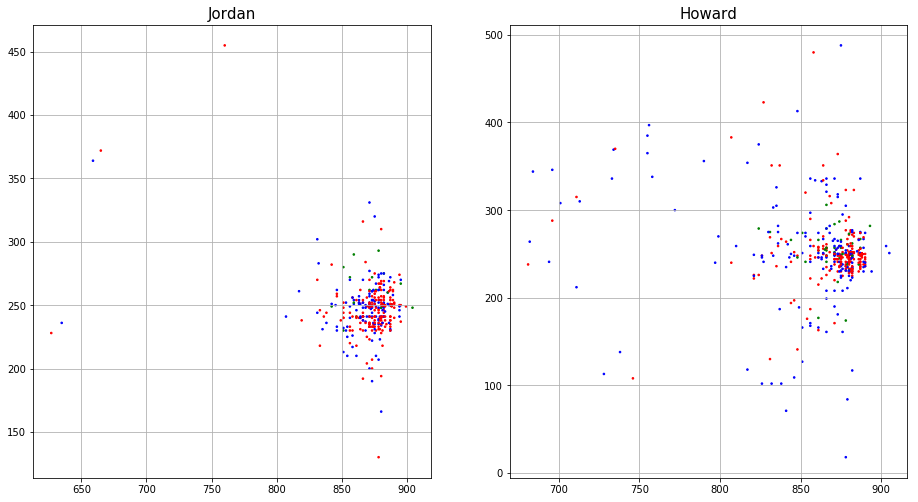

In [21]:
hxJ = Jordan['halfcourt_x']
hyJ = Jordan['halfcourt_y']
hxH = Howard['halfcourt_x']
hyH = Howard['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(Jordan['current_shot_outcome']=='SCORED','r',np.where(Jordan['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxJ,hyJ, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Jordan", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(Howard['current_shot_outcome']=='SCORED','r',np.where(Howard['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxH,hyH, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Howard", fontsize = 15)

## Lopez - Lopez Comparision

In [17]:
# BLopez subset

BLopez = shot[shot['shoot_player']=='Brook Lopez']
BLopez

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
13896,NaN,C,No,878.0,NaN,BOS,Driving Hook Shot,2,BRO,151.0,0:14,10/26/2016,Brook Lopez,NaN,1,MISSED,878.0,151.0
13900,SCORED,C,No,828.0,MISSED,BOS,Jump Shot,2,BRO,288.0,2:24,10/26/2016,Brook Lopez,34.0,1,BLOCKED,828.0,288.0
13904,MISSED,C,No,890.0,MISSED,BOS,Tip Layup Shot,2,BRO,250.0,3:57,10/26/2016,Brook Lopez,1.0,1,MISSED,890.0,250.0
13907,SCORED,C,No,882.0,SCORED,BOS,Layup,2,BRO,241.0,5:37,10/26/2016,Brook Lopez,25.0,1,MISSED,882.0,241.0
13920,MISSED,C,No,647.0,SCORED,BOS,Jump Shot,3,BRO,199.0,1:41,10/26/2016,Brook Lopez,38.0,2,SCORED,647.0,199.0
13958,BLOCKED,C,No,131.0,SCORED,BOS,Fadeaway Jumper,2,BRO,280.0,9:00,10/26/2016,Brook Lopez,13.0,3,MISSED,802.0,220.0
13960,SCORED,C,No,285.0,MISSED,BOS,Jump Shot,3,BRO,349.0,9:59,10/26/2016,Brook Lopez,27.0,3,MISSED,648.0,151.0
13993,NaN,C,Yes,116.0,MISSED,BRO,Floating Jump Shot,2,IND,287.0,0:35,10/28/2016,Brook Lopez,NaN,1,SCORED,817.0,213.0
13994,SCORED,C,Yes,27.0,MISSED,BRO,Jump Shot,3,IND,495.0,1:02,10/28/2016,Brook Lopez,27.0,1,MISSED,906.0,5.0
14001,SCORED,C,Yes,35.0,SCORED,BRO,Jump Shot,3,IND,496.0,4:57,10/28/2016,Brook Lopez,70.0,1,MISSED,898.0,4.0


In [18]:
# RLopez subset

RLopez = shot[shot['shoot_player']=='Robin Lopez']
RLopez

,self_previous_shot,player_position,home_game,location_x,opponent_previous_shot,home_team,shot_type,points,away_team,location_y,time,date,shoot_player,time_from_last_shot,quarter,current_shot_outcome,halfcourt_x,halfcourt_y
27886,MISSED,C,Yes,102.0,MISSED,CHI,Hook Shot,2,BOS,243.0,1:27,10/27/2016,Robin Lopez,12.0,1,MISSED,831.0,257.0
27894,MISSED,C,Yes,67.0,SCORED,CHI,Tip Layup Shot,2,BOS,246.0,5:15,10/27/2016,Robin Lopez,1.0,1,SCORED,866.0,254.0
27896,SCORED,C,Yes,52.0,MISSED,CHI,Cutting Dunk Shot,2,BOS,250.0,6:51,10/27/2016,Robin Lopez,56.0,1,SCORED,881.0,250.0
27898,BLOCKED,C,Yes,146.0,MISSED,CHI,Jump Shot,2,BOS,401.0,7:14,10/27/2016,Robin Lopez,7.0,1,MISSED,787.0,99.0
27900,SCORED,C,Yes,72.0,SCORED,CHI,Turnaround Hook Shot,2,BOS,174.0,8:21,10/27/2016,Robin Lopez,38.0,1,MISSED,861.0,326.0
27931,MISSED,C,Yes,887.0,SCORED,CHI,Tip Layup Shot,2,BOS,241.0,0:35,10/27/2016,Robin Lopez,2.0,3,SCORED,887.0,241.0
27939,BLOCKED,C,Yes,760.0,SCORED,CHI,Jump Shot,2,BOS,324.0,5:46,10/27/2016,Robin Lopez,55.0,3,MISSED,760.0,324.0
27953,MISSED,C,Yes,878.0,MISSED,CHI,Tip Layup Shot,2,BOS,249.0,0:21,10/27/2016,Robin Lopez,1.0,4,MISSED,878.0,249.0
27978,MISSED,C,Yes,52.0,MISSED,CHI,Dunk,2,IND,250.0,0:59,10/29/2016,Robin Lopez,9.0,1,BLOCKED,881.0,250.0
27982,MISSED,C,Yes,52.0,MISSED,CHI,Dunk,2,IND,250.0,2:09,10/29/2016,Robin Lopez,19.0,1,SCORED,881.0,250.0


Text(0.5, 1.0, 'Robin Lopez')

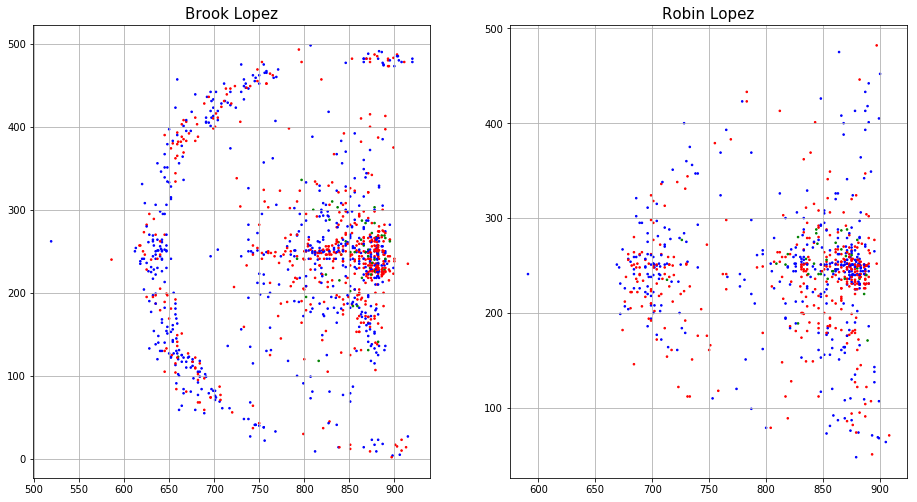

In [19]:
# BLopez and Kevin BLopez side by side
hxB = BLopez['halfcourt_x']
hyB = BLopez['halfcourt_y']
hxR = RLopez['halfcourt_x']
hyR = RLopez['halfcourt_y']

f = plt.figure(figsize=(94/6,50/6))
ax = f.add_subplot(121)
colors = np.where(BLopez['current_shot_outcome']=='SCORED','r',np.where(BLopez['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxB,hyB, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Brook Lopez", fontsize = 15)
ax = f.add_subplot(122)
colors = np.where(RLopez['current_shot_outcome']=='SCORED','r',np.where(RLopez['current_shot_outcome']=='MISSED','b','g'))
ax = plt.scatter(hxR,hyR, s=10, c= colors, marker= '.')
plt.grid(True)
plt.title("Robin Lopez", fontsize = 15)